# requests

- requests는 browser 없이 python에서 direact로 server에 http 요청을 넣음

- 요청을 받은 page는 해당 page의 source code를 python 내부로 전송해줌

- 단, button click이나 광고 닫기 등의 작업은 browser가 없기 때문에 불가능하며

- 오직 특정 url 로 접속했을 때 최초에 전송되는 page code만 가져올 수 있음

- 대신 물리 browser를 직접 켜지 않고, 명목상 requests 하기 때문에

- 속도나 resource면에서는 훨씬 우월함

pc가 server에 요청방법
1. 내가 브라우저로 특정 서버 주소를 쳐서 접속시도를 합니다.
2. 서버에 내가 접속한다는 요청이 들어갑니다.
3. 서버가 요청에 응답 하면서 response데이터를 함께 전송합니다.
4. 브라우저가 받은 데이터를 해석해서 내 PC에 반영합니다.
    
    -1. 웹사이트 접속이었으면 소스코드를 받아 사람이 볼 수 있도록 렌더링 해줍니다.
    
    -2. 게임이면 해당 명령어가 들어가서 게임 상황에 반영됩니다.

In [3]:
import requests
from bs4 import BeautifulSoup
import time

In [4]:
# 특정 주소에 대한 요청은 requests.get('url')
# requests에 대한 server의 response은 req 변수에 저장
req = requests.get("https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0&page=7&cnt=1000&SortOrder=1")

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
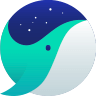
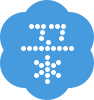

In [5]:
# html sourcecode 읽어오기(selenium의 text와 문법은 같으나 기능이 다름)
req.text

In [7]:
type(req)

requests.models.Response

In [ ]:
# req.text를 이용하면 selenium의 driver.page_source와 동일한 code를 받아옴
source = req.text

In [9]:
# html header 가져오기
# requests에 따른 상세 정보를 보여줌
req.headers

{'Server': 'NWS', 'Date': 'Fri, 14 Oct 2022 01:43:42 GMT', 'Content-Type': 'text/html; charset=UTF-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Set-Cookie': 'PM_CK_loc=eeb1b259a03c465783af0c5c528ee7b7f75400c8075582247a7d434d73103936; Expires=Sat, 15 Oct 2022 01:43:42 GMT; Path=/; HttpOnly', 'Cache-Control': 'no-cache, no-store, must-revalidate', 'Pragma': 'no-cache', 'P3P': 'CP="CAO DSP CURa ADMa TAIa PSAa OUR LAW STP PHY ONL UNI PUR FIN COM NAV INT DEM STA PRE"', 'X-Frame-Options': 'DENY', 'X-XSS-Protection': '1; mode=block', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=63072000; includeSubdomains', 'Referrer-Policy': 'unsafe-url'}

In [10]:
# html 상태code 가져오기
req.status_code

200

In [ ]:
# 이후 BeautifulSoup와 parsing은 기존에 하던 방식과 같음

# 알라딘 베스트셀러 7페이지 크롤링

In [12]:
req = requests.get("https://www.aladin.co.kr/shop/common/wbest.aspx?BestType=Bestseller&BranchType=1&CID=0&page=7&cnt=1000&SortOrder=1")
req.text

'\r\n\r\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\r\n \r\n<html xmlns="http://www.w3.org/1999/xhtml" >\r\n  <head>\r\n    <title>알라딘: 베스트셀러</title>\r\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\r\n    \r\n    <style type="text/css">\r\n    <!--\r\n    body {\r\n      margin-left: 0px;\r\n      margin-top: 0px;\r\n      margin-right: 0px;\r\n      margin-bottom: 0px;\r\n    }\r\n    -->\r\n    </style>\r\n    <script type="text/javascript" src="/shop/common/allitemcheck.js?ver=2022101411"></script>\r\n\t<script type="text/javascript" src="/shop/common/basket_add.js?ver=202210141110"></script>\r\n\t<script type="text/javascript" src="/shop/common/safebasket_add.js?ver=2022101411"></script>\r\n    <script type="text/javascript">\r\n        function FindZipByList(addInputShop) {\r\n            var addInputShopObj = $(addInputShop);\r\n\r\n            if (!addInputShopObj)\r\n    

In [13]:
source = req.text

parsed_source = BeautifulSoup(source,"html.parser")

In [43]:
req_seven_list = parsed_source.find_all("div",class_="ss_book_box")

len(req_seven_list)

50

In [45]:
for book in req_seven_list:
    req_list = book.find_all("li")    

    if(req_list[1].text[0] == '['):
        print(req_list[1].text)
        print(req_list[2].text)
        print(req_list[3].text)
    else:
        print(req_list[1].text)
        print(req_list[2].text)
        print(req_list[3].text)
    print("--------------------------------")

[국내도서] 세상 쉬운 영문법 
윤여홍 (지은이) | 시간과공간사 | 2022년 10월
19,800원 → 17,820원 (10%할인),  마일리지 990원 (5% 적립)
--------------------------------
[국내도서] 어떻게 말해줘야 할까 (60만 부 기념 한정판 리커버) 
오은영 (지은이), 차상미 (그림) | 김영사 | 2022년 7월
17,500원 → 15,750원 (10%할인),  마일리지 870원 (5% 적립)
--------------------------------
[국내도서] 브라질에 비가 내리면 스타벅스 주식을 사라 
피터 나바로 (지은이), 이창식 (옮긴이), 윤지호 (감수) | 에프엔미디어 | 2022년 4월
18,000원 → 16,200원 (10%할인),  마일리지 900원 (5% 적립)
--------------------------------
[국내도서] 재수사 2  
장강명 (지은이) | 은행나무 | 2022년 8월
16,000원 → 14,400원 (10%할인),  마일리지 800원 (5% 적립)
--------------------------------
[국내도서] 뇌, 욕망의 비밀을 풀다  
한스-게오르크 호이젤 (지은이), 강영옥, 김신종, 한윤진 (옮긴이) | 비즈니스북스 | 2019년 10월
18,000원 → 16,200원 (10%할인),  마일리지 900원 (5% 적립)
--------------------------------
[국내도서] 임신 출산 육아 대백과 (2022~2023년 개정판) 
삼성출판사 편집부 (엮은이) | 삼성출판사 | 2022년 7월
19,500원 → 17,550원 (10%할인),  마일리지 970원 (5% 적립)
--------------------------------
[국내도서] 부동산 경매로 1년 만에 꼬마빌딩주 되다 
김상준 (지은이) | 매일경제신문사 | 2022년 9월
18,000원 → 16,200원 (10%할인),  마일리지 900원 (5% 적립)
--------